## Heart Disease Prediction

### Data Reading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
heart_data = pd.read_csv("heart.csv")
df = heart_data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Observation and Cleaning

#### Check the data types

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Check the missing values

In [36]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Check the duplicates

In [37]:
df.duplicated().sum()

np.int64(1)

In [38]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [39]:
# We can see that two columns is identical. So, keep the first row and remove the second.
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

#### Visualize the distributions 

In [42]:
cols = df.columns

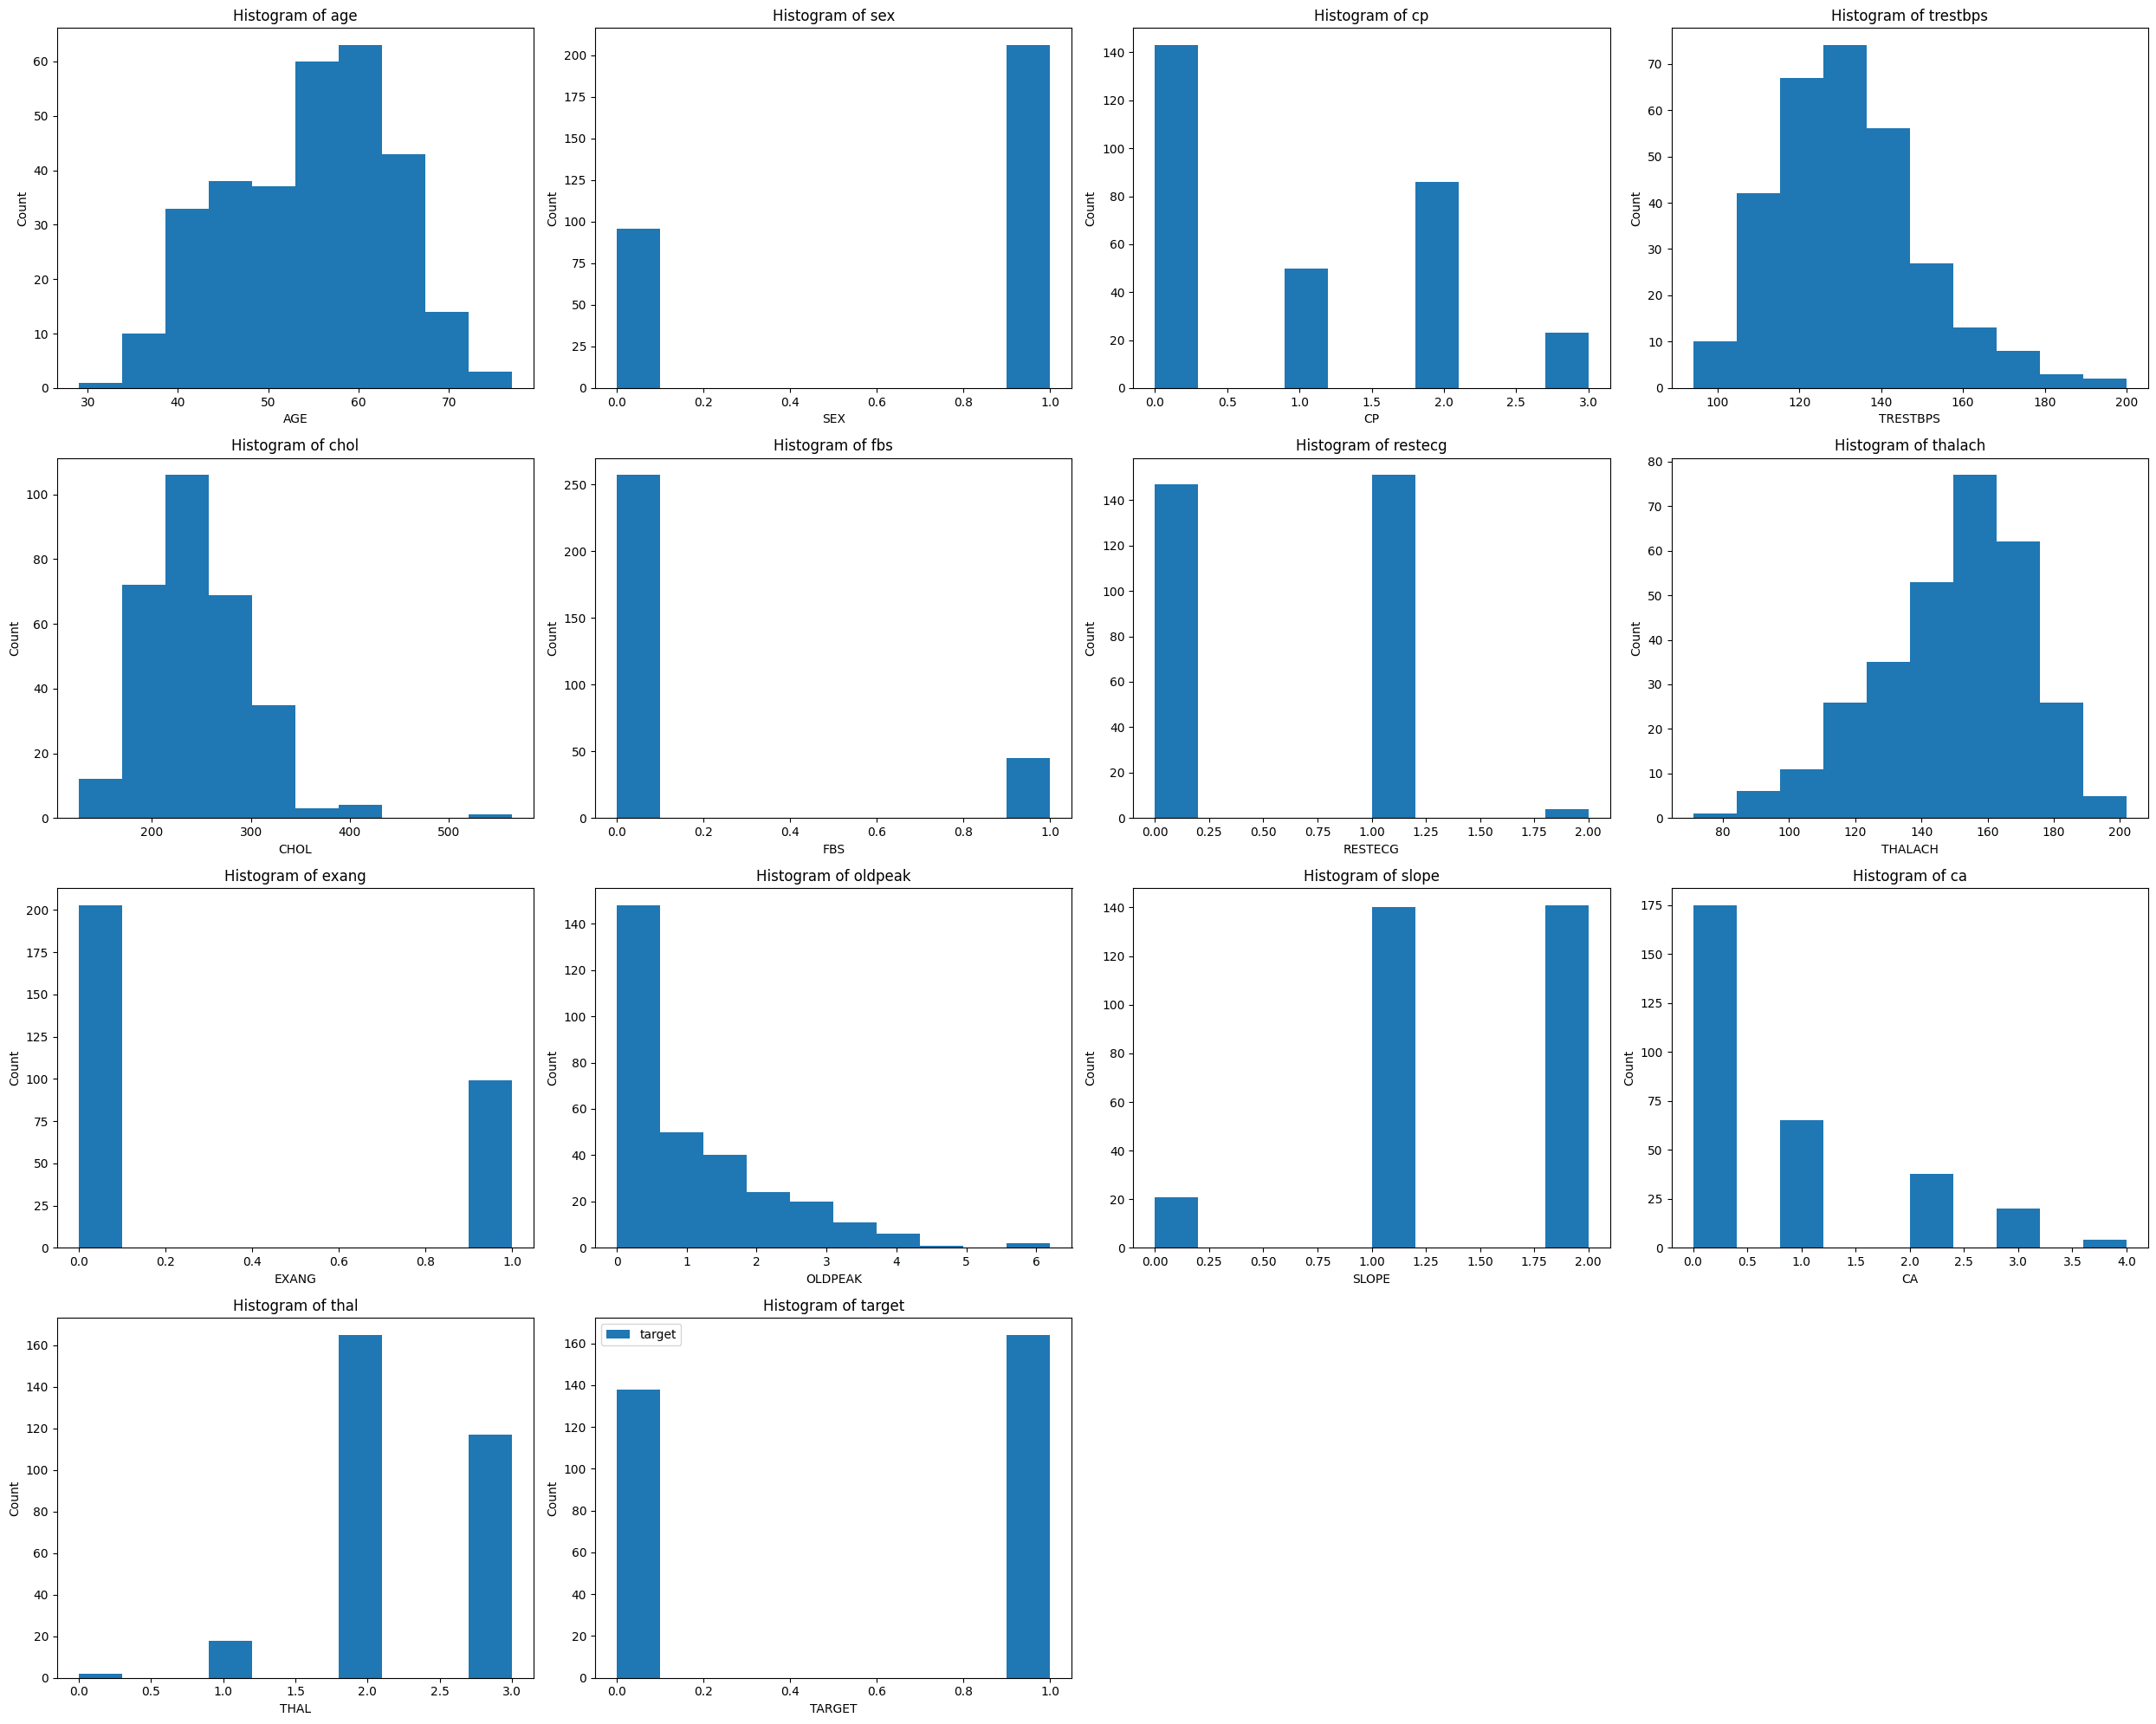

In [53]:
fig,axes = plt.subplots(nrows=4, ncols=4, figsize=(25,20))
axes = axes.flatten()
for i, col in enumerate(cols):
    axes[i].hist(df[col], label = f"{col}")
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(f"{col.upper()}")

fig.delaxes(axes[14])
fig.delaxes(axes[15])
plt.legend()
plt.tight_layout()
plt.show()

#### Check the outliers

The following variables must be investigated to find and remove outliers, because these are numerical values:
- age
- trestbps
- chol
- thalach
- oldpeak

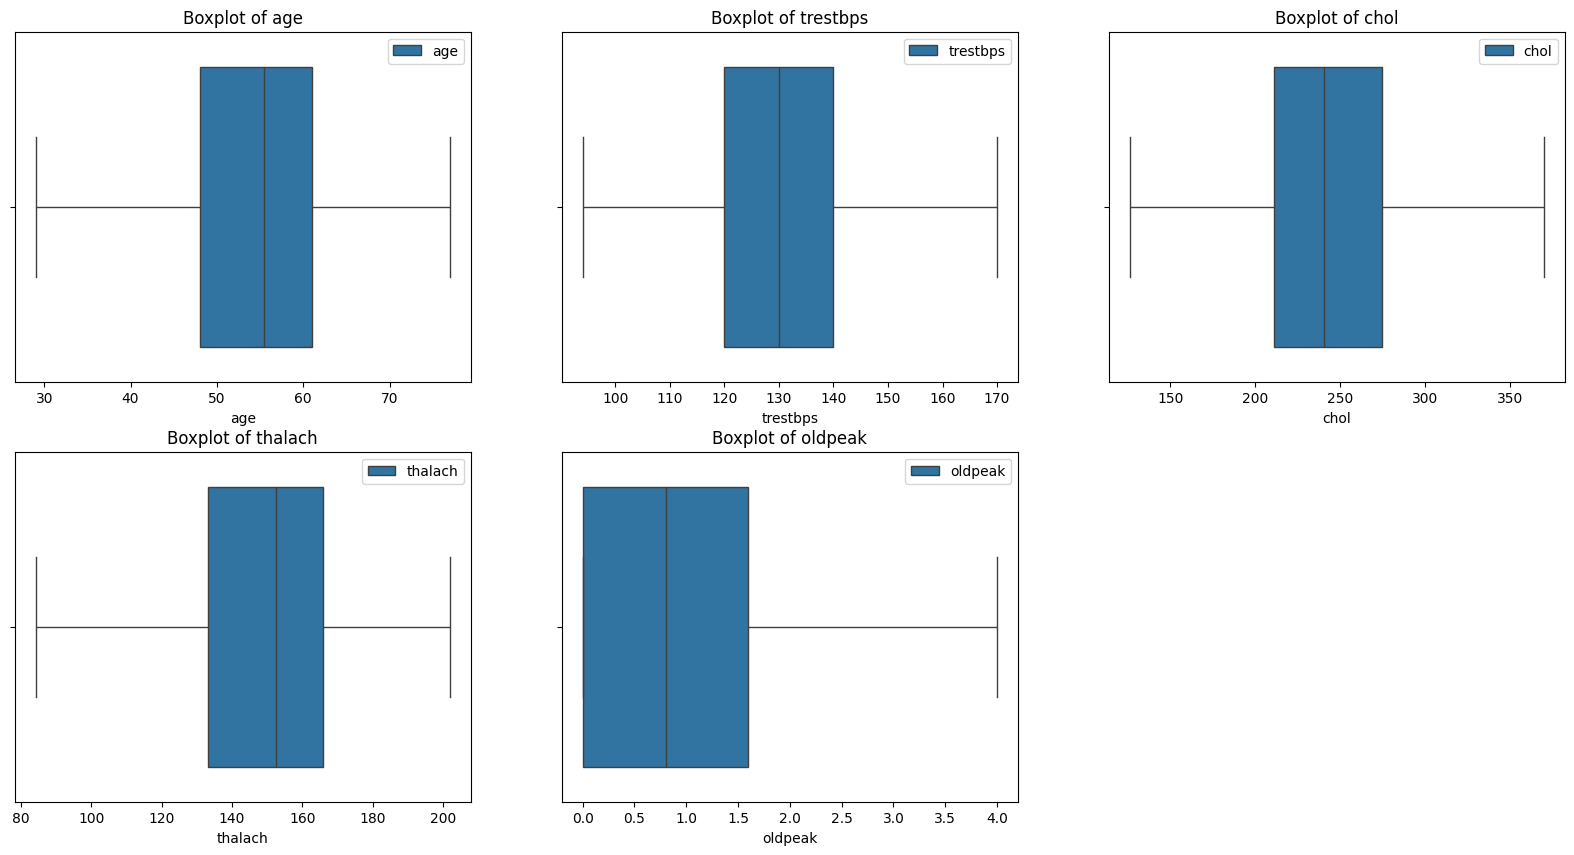

In [59]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(20,10))

axes = axes.flatten()
numeric_cols = ["age","trestbps","chol","thalach", "oldpeak"]

for ix, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x = col,ax=axes[ix], label=f"{col}")
    axes[ix].set_title(f"Boxplot of {col}")
    axes[ix].set_xlabel(col)
    axes[ix].legend()
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])
plt.show()

#### Remove the outliers

In [57]:
def find_outliers(x): 
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return lower_bound, upper_bound

In [58]:
for i in numeric_cols: 
    lower, upper = find_outliers(df[i])
    df[i] = np.clip(a = df[i], a_min = lower, a_max = upper)

### Scale the variables

In [29]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [64]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.828927,-0.261076,1,0,0.017027,0,1.147606,0,0,1,1
1,-1.928548,1,2,-0.075902,0.097514,0,1,1.644957,0,2.230096,0,0,2,1
2,-1.485726,0,1,-0.075902,-0.872787,0,0,0.984985,0,0.335739,2,0,2,1
3,0.174856,1,1,-0.679121,-0.197795,0,1,1.248974,0,-0.205506,2,0,2,1
4,0.285561,0,0,-0.679121,2.291236,0,1,0.589003,1,-0.385921,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0,0.527318,-0.092328,0,1,-1.170921,1,-0.746751,1,0,3,0
299,-1.042904,1,3,-1.282340,0.392823,0,1,-0.774938,0,0.155324,1,0,3,0
300,1.503322,1,0,0.768605,-1.104815,1,1,-0.378955,0,2.139889,1,2,3,0
301,0.285561,1,0,-0.075902,-2.412611,0,1,-1.522906,1,0.155324,1,1,3,0


### Data Split for Model

In [83]:
X = df.drop('target',axis=1)
y = df['target']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=111,
                                                   shuffle=True)

### Import Models and Metrics

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve

### Support Vector Machines SVM

In [247]:
svm = SVC(kernel='rbf', probability=True)

In [248]:
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [249]:
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:,1]

In [250]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)


In [251]:
index = ["Accuracy score", "Recall score", "Precision score","ROC&AUC"]
results = [accuracy,recall,precision, roc]

In [252]:
results = pd.DataFrame(data=results,
                      index=index,
                      columns=["SVM(rbf)"])
results

,SVM(rbf)
Accuracy score,0.868852
Recall score,0.925000
Precision score,0.880952
ROC&AUC,0.928571


In [253]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
results_for_plot = {"SVM(rbf)": [fpr, tpr]}

##### SVM with linear kernel

In [254]:
svm = SVC(kernel = "linear", probability=True)

In [255]:
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [256]:
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:,1]

In [257]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

In [258]:
results["SVM(linear)"] = [accuracy, recall, precision, roc]
results

,SVM(rbf),SVM(linear)
Accuracy score,0.868852,0.901639
Recall score,0.925000,0.925000
Precision score,0.880952,0.925000
ROC&AUC,0.928571,0.929762


In [259]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
results_for_plot["SVM(linear)"]= [fpr, tpr]

### Decision Tree

In [260]:
dtree = DecisionTreeClassifier(max_depth=11,random_state=111)

In [261]:
dtree.fit(X_train, y_train) 

,criterion,'gini'
,splitter,'best'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,111
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [262]:
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)[:,1]

In [263]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

In [264]:
results["Decision Tree"] = [accuracy,recall,precision,roc]
results

,SVM(rbf),SVM(linear),Decision Tree
Accuracy score,0.868852,0.901639,0.852459
Recall score,0.925000,0.925000,0.875000
Precision score,0.880952,0.925000,0.897436
ROC&AUC,0.928571,0.929762,0.842262


In [265]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
results_for_plot["Decision Tree"]= [fpr, tpr]

### Random Forest

In [266]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100,max_depth=11,random_state=111)

In [267]:
randfor.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [268]:
y_pred = randfor.predict(X_test)
y_prob = randfor.predict_proba(X_test)[:,1]

In [269]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

In [270]:
results["Random Forest"] = [accuracy,recall,precision,roc]
results

,SVM(rbf),SVM(linear),Decision Tree,Random Forest
Accuracy score,0.868852,0.901639,0.852459,0.852459
Recall score,0.925000,0.925000,0.875000,0.875000
Precision score,0.880952,0.925000,0.897436,0.897436
ROC&AUC,0.928571,0.929762,0.842262,0.925000


In [271]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
results_for_plot["Random Forest"] = [fpr, tpr]

### Logistic Regression

In [272]:
logreg = LogisticRegression()

In [273]:
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [274]:
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]

In [275]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

In [276]:
results["Logistic Regression"] = [accuracy,recall,precision,roc]
results

,SVM(rbf),SVM(linear),Decision Tree,Random Forest,Logistic Regression
Accuracy score,0.868852,0.901639,0.852459,0.852459,0.901639
Recall score,0.925000,0.925000,0.875000,0.875000,0.900000
Precision score,0.880952,0.925000,0.897436,0.897436,0.947368
ROC&AUC,0.928571,0.929762,0.842262,0.925000,0.928571


In [277]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
results_for_plot["Logistic Regression"] = [fpr, tpr]

### Naive Bayes

In [278]:
nb = GaussianNB()

In [279]:
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [280]:
y_pred = nb.predict(X_test)

In [281]:
y_prob = nb.predict_proba(X_test)[:,1]

In [282]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

In [283]:
results["Naive Bayes"] = [accuracy,recall,precision,roc]
results

,SVM(rbf),SVM(linear),Decision Tree,Random Forest,Logistic Regression,Naive Bayes
Accuracy score,0.868852,0.901639,0.852459,0.852459,0.901639,0.868852
Recall score,0.925000,0.925000,0.875000,0.875000,0.900000,0.875000
Precision score,0.880952,0.925000,0.897436,0.897436,0.947368,0.921053
ROC&AUC,0.928571,0.929762,0.842262,0.925000,0.928571,0.923810


In [284]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
results_for_plot["Naive Bayes"] =  [fpr, tpr]

In [296]:
results_for_plot

{'SVM(rbf)': [array([0.        , 0.        , 0.        , 0.04761905, 0.04761905,
         0.61904762, 0.61904762, 0.76190476, 0.76190476, 0.80952381,
         0.80952381, 1.        ]),
  array([0.   , 0.025, 0.575, 0.575, 0.925, 0.925, 0.95 , 0.95 , 0.975,
         0.975, 1.   , 1.   ])],
 'SVM(linear)': [array([0.        , 0.        , 0.        , 0.04761905, 0.04761905,
         0.0952381 , 0.0952381 , 0.14285714, 0.14285714, 0.42857143,
         0.42857143, 0.66666667, 0.66666667, 0.85714286, 0.85714286,
         1.        ]),
  array([0.   , 0.025, 0.575, 0.575, 0.85 , 0.85 , 0.9  , 0.9  , 0.925,
         0.925, 0.95 , 0.95 , 0.975, 0.975, 1.   , 1.   ])],
 'Decision Tree': [array([0.        , 0.19047619, 1.        ]),
  array([0.   , 0.875, 1.   ])],
 'Random Forest': [array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

### KNN

In [285]:
knn = KNeighborsClassifier()

In [286]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [287]:
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

In [288]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

In [289]:
results["KNN"] = [accuracy,recall,precision,roc]

In [290]:
results

,SVM(rbf),SVM(linear),Decision Tree,Random Forest,Logistic Regression,Naive Bayes,KNN
Accuracy score,0.868852,0.901639,0.852459,0.852459,0.901639,0.868852,0.868852
Recall score,0.925000,0.925000,0.875000,0.875000,0.900000,0.875000,0.875000
Precision score,0.880952,0.925000,0.897436,0.897436,0.947368,0.921053,0.921053
ROC&AUC,0.928571,0.929762,0.842262,0.925000,0.928571,0.923810,0.928571


In [291]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
results_for_plot["KNN"] =  [fpr, tpr]

### Summary

According to the results, the SVM(linear) is the best algorithm for classification based on the metrics. Let's visualize the AUC&ROC curves.

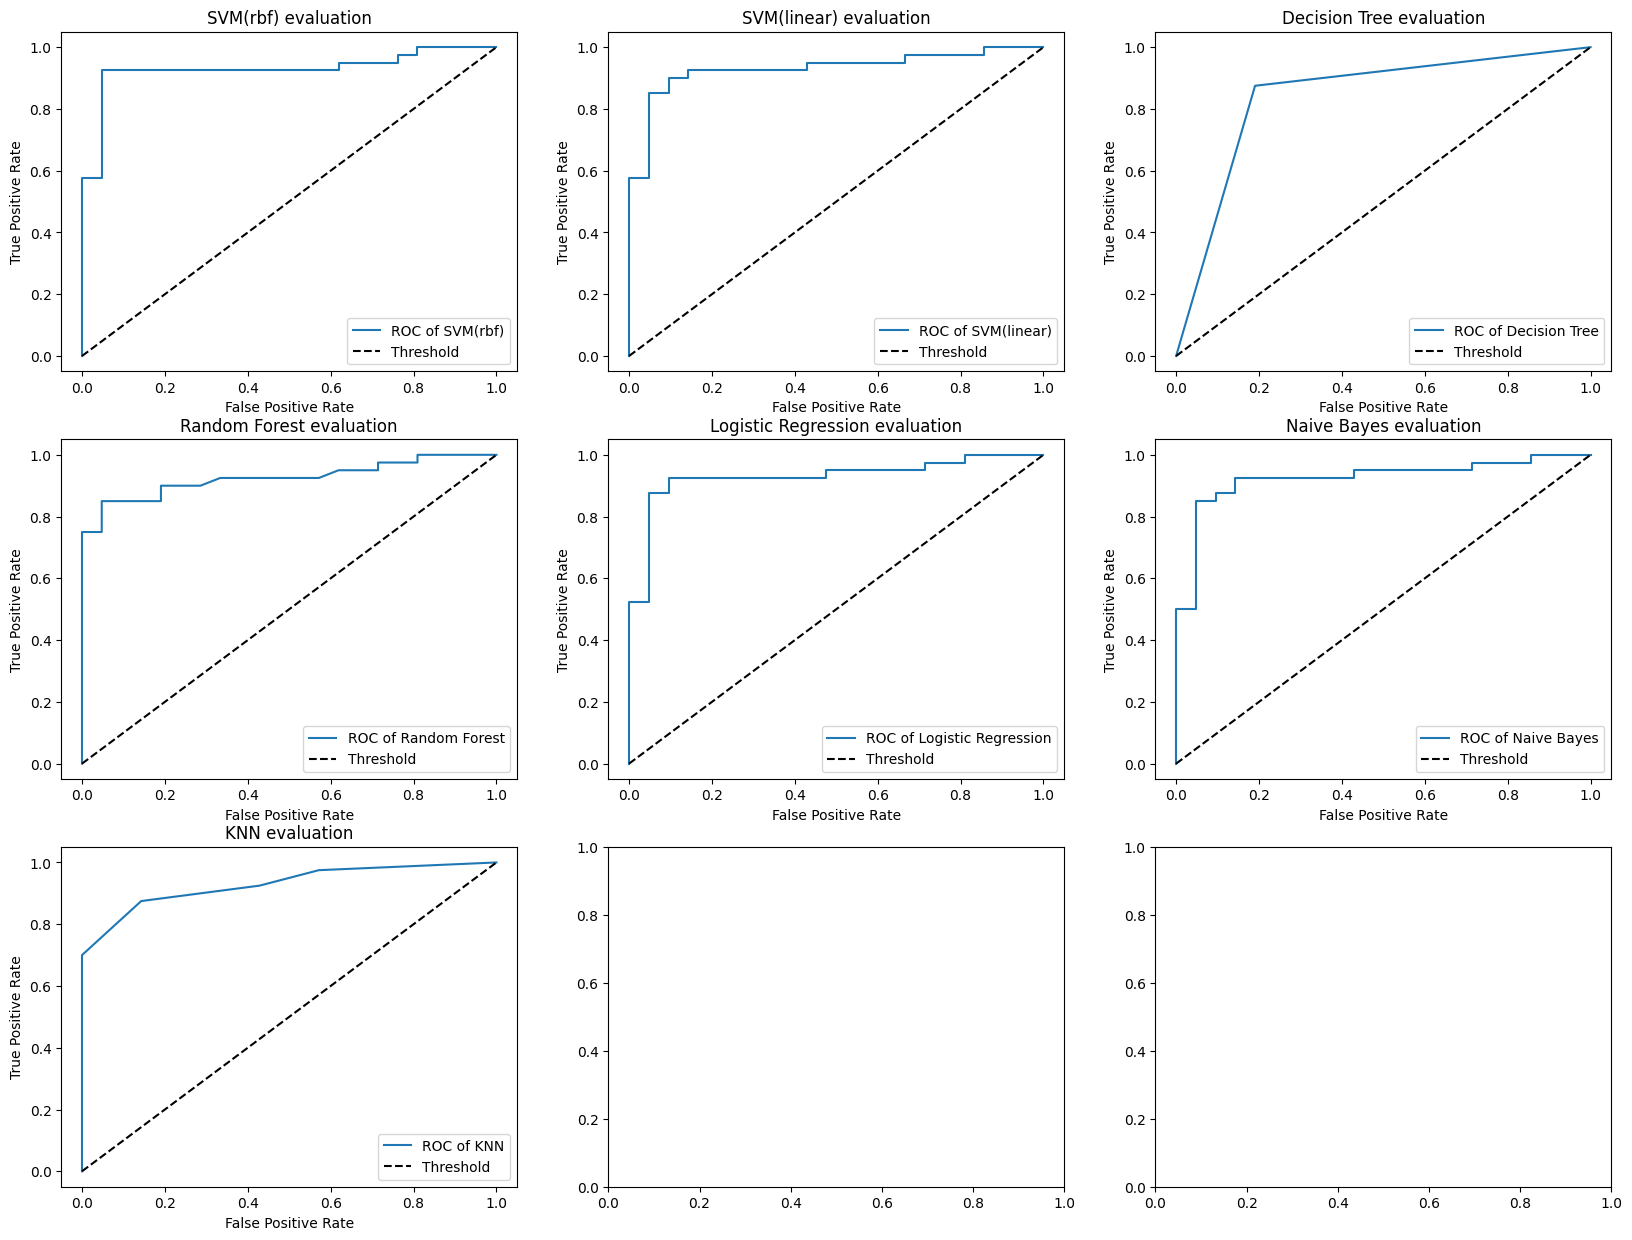

In [295]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(20,15))
axes = axes.flatten()
for i,(model,(fpr,tpr)) in enumerate(results_for_plot.items()):
    axes[i].plot(fpr,tpr, label=f"ROC of {model}")
    axes[i].plot([0,1], [0,1], 'k--', label="Threshold")
    axes[i].set_title(f"{model} evaluation")
    axes[i].set_xlabel("False Positive Rate")
    axes[i].set_ylabel("True Positive Rate")
    axes[i].legend()
plt.show()

### Gini metrics

In [300]:
from sklearn.metrics import auc

In [301]:
gini_scores = {}
for model, (fpr, tpr) in results_for_plot.items():
    model_auc = auc(fpr, tpr)
    gini = 2 * model_auc - 1
    gini_scores[model] = gini

In [307]:
Gini_scores = pd.DataFrame(gini_scores, index = ["Gini-score"])

In [308]:
Gini_scores

,SVM(rbf),SVM(linear),Decision Tree,Random Forest,Logistic Regression,Naive Bayes,KNN
Gini-score,0.857143,0.859524,0.684524,0.85,0.857143,0.847619,0.857143


## Final Decision

According to the evaluation metric results, ROC curves and Gini scores, we can confidently say that SVM algorithms, especially linear kernel SVM model outperforms other models with higher scores. All models except Decision Tree did quite good job in classification. As a best model, I took **SVM with linear kernel**.